# Hiperparametrizacion para Clasificación: Predicción de la Calidad del Aire

1. Preparación de Datos
2. División de los Datos
3. Hiperparametrización con el 70%
4. Evaluación del mejor Modelo con el 30%
5. Guardar el Modelo

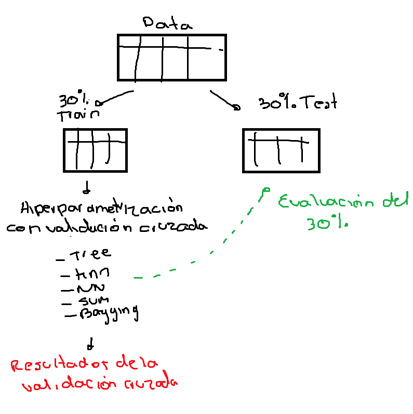

In [ ]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparación de Datos


In [ ]:
#Cargamos los datos
data = pd.read_excel("prediccionCalidadAire.xlsx", sheet_name='Historico')
data.head()

,Clima,Temperatura,Humedad,PM25,Alerta
0,lluvioso,65,70,245,Si
1,lluvioso,71,91,253,Si
2,lluvioso,65,70,298,Si
3,lluvioso,71,91,278,Si
4,nublado,65,70,243,Si


In [ ]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clima        220 non-null    object
 1   Temperatura  220 non-null    int64 
 2   Humedad      220 non-null    int64 
 3   PM25         220 non-null    int64 
 4   Alerta       220 non-null    object
dtypes: int64(3), object(2)
memory usage: 8.7+ KB


In [ ]:
#Descripción de variables numéricas
data.describe()

,Temperatura,Humedad,PM25
count,220.000000,220.000000,220.000000
mean,70.550000,81.100000,175.754545
std,5.984169,10.386547,102.123409
min,64.000000,65.000000,10.000000
25%,65.000000,70.000000,50.000000
50%,70.500000,82.500000,200.000000
75%,71.250000,91.000000,255.750000
max,85.000000,96.000000,298.000000


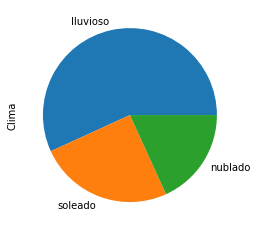

In [ ]:
#Descripción variables categóricas
data['Clima'].value_counts().plot(kind='pie')

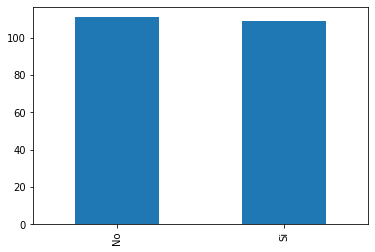

In [ ]:
data['Alerta'].value_counts().plot(kind='bar')

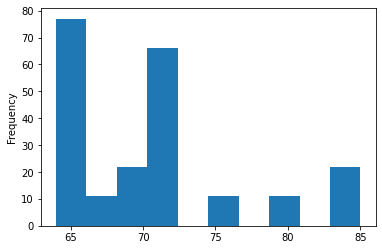

In [ ]:
data['Temperatura'].plot(kind='hist')

In [ ]:
#Sklearn sólo analiza variables numéricas
data = pd.get_dummies(data, columns=['Clima'], drop_first=False)
data.head()

,Temperatura,Humedad,PM25,Alerta,Clima_lluvioso,Clima_nublado,Clima_soleado
0,65,70,245,Si,1,0,0
1,71,91,253,Si,1,0,0
2,65,70,298,Si,1,0,0
3,71,91,278,Si,1,0,0
4,65,70,243,Si,0,1,0


In [ ]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Alerta"]=labelencoder.fit_transform(data["Alerta"])

data.head()

,Temperatura,Humedad,PM25,Alerta,Clima_lluvioso,Clima_nublado,Clima_soleado
0,65,70,245,1,1,0,0
1,71,91,253,1,1,0,0
2,65,70,298,1,1,0,0
3,71,91,278,1,1,0,0
4,65,70,243,1,0,1,0


# 2. División 70-30


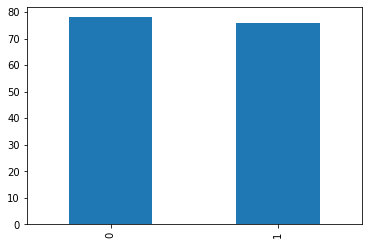

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Alerta", axis = 1) # Variables predictoras
Y = data['Alerta'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

# 3. Hiperparametrización con el 70%

# **Hiperparametrización Arbol de Clasificación**

In [ ]:
#Hiperparametrización 
from sklearn.model_selection import GridSearchCV

In [ ]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,10,50,100] # Cantidad de registros por hoja
max_depth=[None, 10,20, 50] #Niveles de profundidad

#Grid
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelTree= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10}
                Tree
f1 de la CV  0.96733


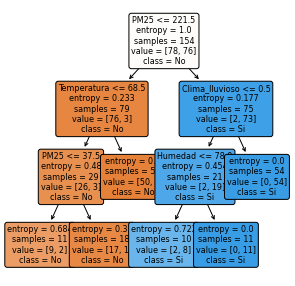

In [ ]:
#Mejor modelo
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True, fontsize=8)
plt.show() 

# **Hiperparametrización Knn para Clasificación**

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Temperatura',	'Humedad',	'PM25']]) #Ajuste de los parametros: max - min

#Se aplica la normalización a 70%  y 30%
X_train[['Temperatura',	'Humedad',	'PM25']]= min_max_scaler.transform(X_train[['Temperatura',	'Humedad',	'PM25']]) #70%
X_test[['Temperatura',	'Humedad',	'PM25']]= min_max_scaler.transform(X_test[['Temperatura',	'Humedad',	'PM25']])  #30%
X_train.head()

,Temperatura,Humedad,PM25,Clima_lluvioso,Clima_nublado,Clima_soleado
16,0.000000,0.00000,0.833333,0,1,0
6,0.047619,0.16129,0.826389,0,1,0
45,0.333333,0.83871,0.951389,1,0,0
193,0.285714,1.00000,0.034722,1,0,0
100,0.047619,0.16129,0.815972,1,0,0


In [ ]:
#KNN
from sklearn.neighbors  import KNeighborsClassifier 
modelKnn = KNeighborsClassifier()

# Definir los hiperparametros
n_neighbors=[1,3,5,7,13,27]
metric=['euclidean','minkowski']

#Grid
param_grid = dict(n_neighbors=n_neighbors, metric=metric)
grid = GridSearchCV(estimator=modelKnn, param_grid=param_grid, scoring='f1_macro', n_jobs=-1,cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelKnn= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['Knn']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'metric': 'euclidean', 'n_neighbors': 3}
                Tree       Knn
f1 de la CV  0.96733  0.954632


# **Hiperparametrización Red Neuronal**

In [ ]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier()


# Definir los parametros
random_state=[1] #Semilla para generar número pseudoaleatorios
solver=['sgd'] # Regla de aprendizaje ['adam','sgd','lbfgs']
learning_rate=['constant','adaptive'] #tasa de aprendizaje
learning_rate_init=[0.2, 0.5, 1.0, 1.5] #valor tasa de aprendizaje
momentum=[0.3, 0.5, 1.0] #momentum
activation=['identity','logistic', 'relu'] #'identity’, ‘logistic’, ‘tanh’, ‘relu’
hidden_layer_sizes=[4, 20,100,[8, 20]] # neuronas de la capa oculta (input+output/2)
max_iter = [100, 200,500,5000] #iteraciones

#Grid
param_grid = dict(random_state=random_state,solver=solver,activation=activation, hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate=learning_rate,
                  learning_rate_init=learning_rate_init, momentum=momentum)
grid = GridSearchCV(estimator=modelNN, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelNN= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['NN']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'activation': 'identity', 'hidden_layer_sizes': 4, 'learning_rate': 'constant', 'learning_rate_init': 0.2, 'max_iter': 100, 'momentum': 0.3, 'random_state': 1, 'solver': 'sgd'}
                Tree       Knn       NN
f1 de la CV  0.96733  0.954632  0.96733


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# **Hiperparametrización SVM para Clasificación**

In [ ]:
#SVM
from sklearn.svm import SVC 
modelSVM = SVC() 

# Definir los hiperparametros
C=[0.1,1,10] #Margen blando
kernel=['linear', 'rbf'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale','auto',0.01,5]

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
                Tree       Knn       NN      SVM
f1 de la CV  0.96733  0.954632  0.96733  0.96733


# **Hiperparametrización Ensambles - Bagging**

In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier()


# Definir los hiperparametros
base_knn= KNeighborsClassifier(n_neighbors=1, metric='euclidean')
base_nn= MLPClassifier(activation="logistic",hidden_layer_sizes=(10), learning_rate='adaptive',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, verbose=False)

base_estimator=[base_knn, base_nn] #Métodos de Machine Learning
n_estimators=[10,50,100] 
max_samples=[0.6,0.7,0.8]

#Grid
param_grid = dict(base_estimator=base_estimator, n_estimators=n_estimators,max_samples=max_samples)
grid = GridSearchCV(estimator=model_bag, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
model_bag= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['Bagging']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'base_estimator': MLPClassifier(activation='logistic', hidden_layer_sizes=10,
              learning_rate='adaptive', learning_rate_init=0.2, max_iter=500,
              momentum=0.3), 'max_samples': 0.6, 'n_estimators': 10}
                Tree       Knn       NN      SVM  Bagging
f1 de la CV  0.96733  0.954632  0.96733  0.96733  0.96733


# **4. Evaluación de los mejores modelos con el 30%**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


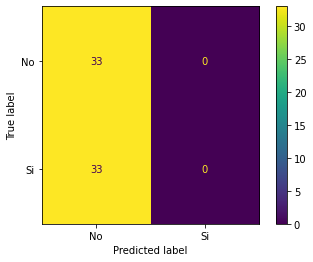

              precision    recall  f1-score   support

          No       0.50      1.00      0.67        33
          Si       0.00      0.00      0.00        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

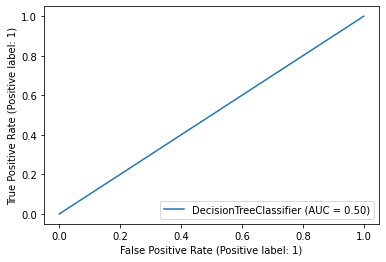

In [ ]:
#Evaluación del mejor Tree con el 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test)

#Matriz de confusion
metrics.plot_confusion_matrix(estimator=modelTree, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  
plt.show()
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))
# Curva ROC
metrics.plot_roc_curve(estimator=modelTree, X=X_test, y=Y_test)  
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


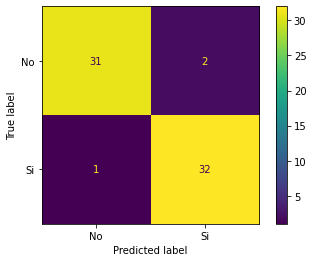

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

          No       0.97      0.94      0.95        33
          Si       0.94      0.97      0.96        33

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.95      0.95      0.95        66



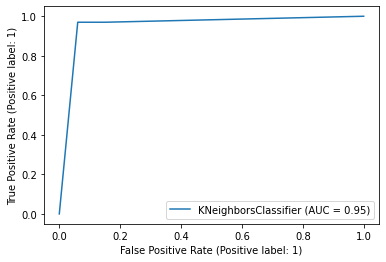

In [ ]:
#Evaluación de Knn
from sklearn import metrics

Y_pred = modelKnn.predict(X_test)

#Matriz de confusion
metrics.plot_confusion_matrix(estimator=modelKnn, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  
plt.show()
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))
# Curva ROC
metrics.plot_roc_curve(estimator=modelKnn, X=X_test, y=Y_test)  
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


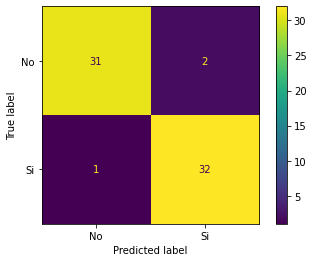

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

          No       0.97      0.94      0.95        33
          Si       0.94      0.97      0.96        33

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.95      0.95      0.95        66



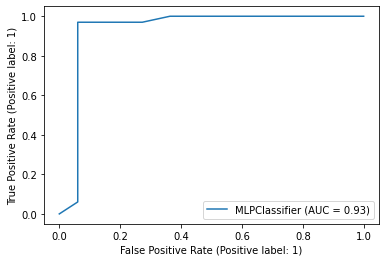

In [ ]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test)

#Matriz de confusion
metrics.plot_confusion_matrix(estimator=modelNN, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  
plt.show()
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))
# Curva ROC
metrics.plot_roc_curve(estimator=modelNN, X=X_test, y=Y_test)  
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


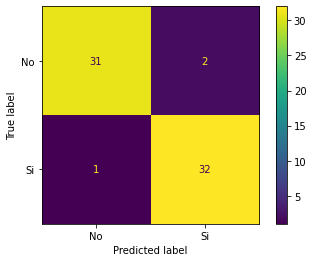

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

          No       0.97      0.94      0.95        33
          Si       0.94      0.97      0.96        33

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.95      0.95      0.95        66



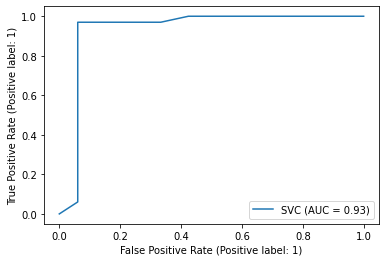

In [ ]:
#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test)

#Matriz de confusion
metrics.plot_confusion_matrix(estimator=modelSVM, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  
plt.show()
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))
# Curva ROC
metrics.plot_roc_curve(estimator=modelSVM, X=X_test, y=Y_test)  
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


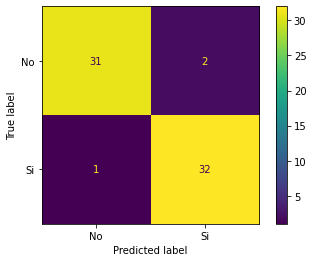

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

          No       0.97      0.94      0.95        33
          Si       0.94      0.97      0.96        33

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.95      0.95      0.95        66



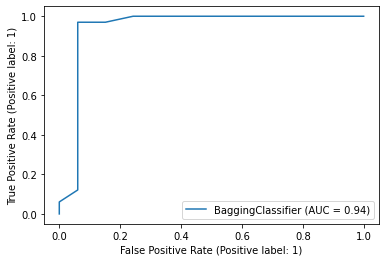

In [ ]:
#Evaluación de Bagging
from sklearn import metrics

Y_pred = model_bag.predict(X_test)

#Matriz de confusion
metrics.plot_confusion_matrix(estimator=model_bag, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  
plt.show()
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))
# Curva ROC
metrics.plot_roc_curve(estimator=model_bag, X=X_test, y=Y_test)  
plt.show() 

# 4. Guardamos el modelo

In [ ]:
import pickle
filename = 'modelo-clas-hiper.pkl'
variables= X.columns._values
pickle.dump([model_bag,labelencoder,variables,min_max_scaler], open(filename, 'wb')) #write
